In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Data

In [3]:
audio_directory_list = os.listdir("/content/drive/MyDrive/audio_emotions")
list_emotion_path=[]

for dir in audio_directory_list:
  for file in os.listdir('/content/drive/MyDrive/audio_emotions/'+dir):
    temp={'emotions':dir,'path': f'/content/drive/MyDrive/audio_emotions/{dir}/{file}'}
    list_emotion_path.append(temp)
emotion_df= pd.DataFrame(list_emotion_path)
emotion_df.tail(5)

,emotions,path
600,disgust,/content/drive/MyDrive/audio_emotions/disgust/...
601,disgust,/content/drive/MyDrive/audio_emotions/disgust/...
602,disgust,/content/drive/MyDrive/audio_emotions/disgust/...
603,disgust,/content/drive/MyDrive/audio_emotions/disgust/...
604,disgust,/content/drive/MyDrive/audio_emotions/disgust/...


Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


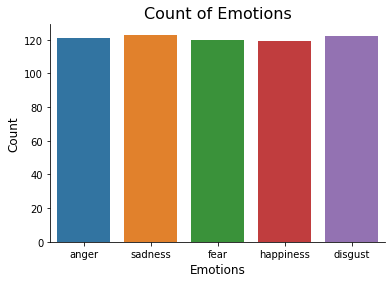

In [4]:
plt.title('Count of Emotions', size=16)
sns.countplot(emotion_df.emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Since, the classes or emptions are almost equaly distributed, we do not need to do class balancing.

Spectogram analysis

In [5]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))  # convertinf file to decibles
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

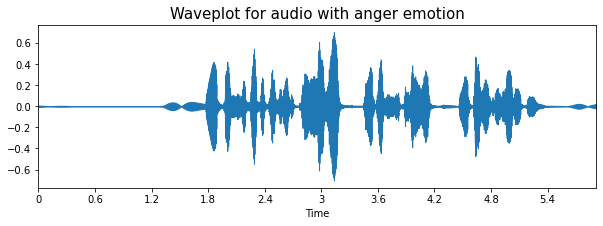

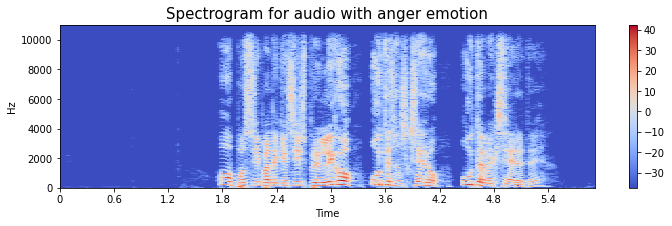

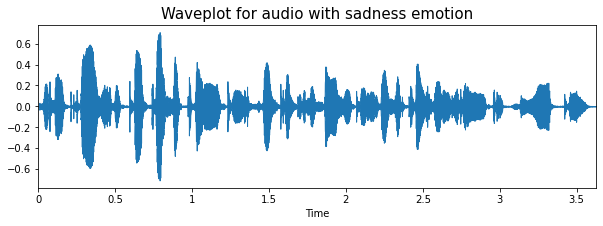

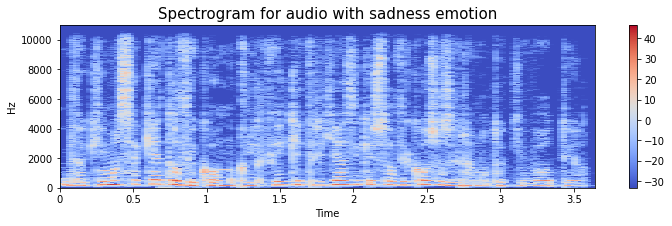

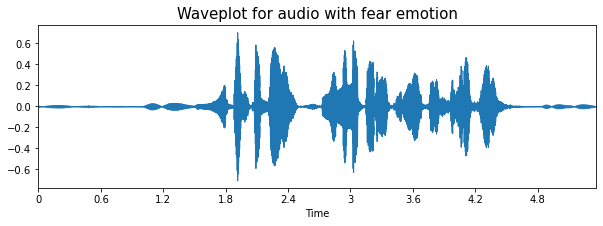

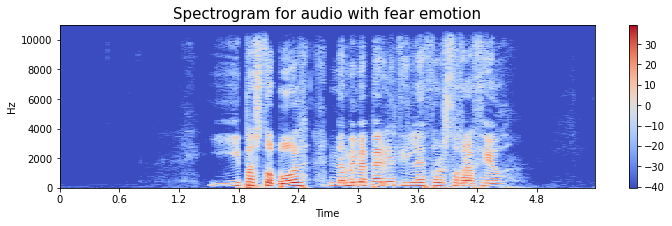

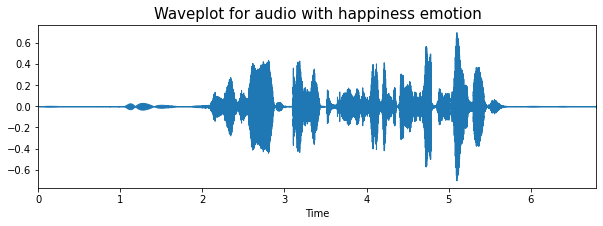

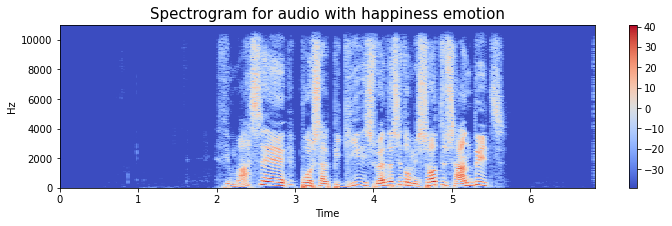

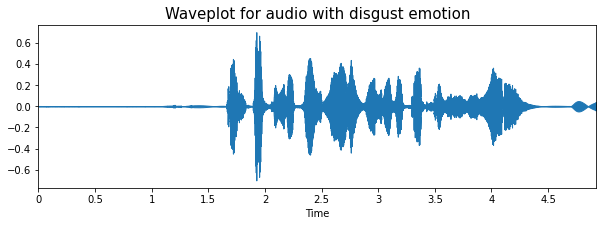

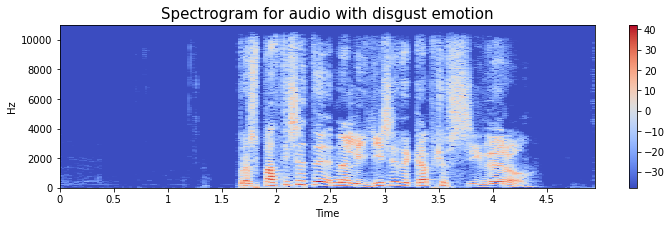

In [8]:
for dir in audio_directory_list:
  emotion=dir
  path = np.array(emotion_df.path[emotion_df.emotions==emotion])[1]
  data, sampling_rate = librosa.load(path)
  create_waveplot(data, sampling_rate, emotion)
  create_spectrogram(data, sampling_rate, emotion)
  Audio(path)

Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking features horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result